In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("mbird_data.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
non_bird = ["Eastern Gray Squirrel", "Roof Rat", "Raccoon", "Muskrat", "Long-tailed Weasel", "Northwestern Garter Snake", "Bullfrog", "Red-eared Slider",
           "Coyote", "American Beaver", "Western Toad", "River Otter", "Painted Turtle", "Virginia Opossum", "Pacific Tree Frog", "Mule Deer", 
           "Big Brown Bat", "Douglas Squirrel", "North American Deer Mouse", "Bobcat", "Eastern Cottontail", "White-tailed Deer", "Townsend's Mole",
           "Northern Flying Squirrel", "Townsend's Chipmonk", "Black-tailed Jack Rabbit", "Mink", "Long-tailed Vole", "Mountain Beaver",
           "Long-toed Salamander", "Coypu", "Black Bear", "Northwestern Salamander", "Little Brown Myotis", "Water Vole", "Northern Leopard Frog"]

In [5]:
bird = []
for val in df["Common Name"].unique():
    if val not in non_bird:
        bird.append(val)

In [6]:
birds_df = df[df['Common Name'].isin(bird)]
columns_keep = ['Common Name', 'Scientific Name', 'Date', 'Number', 'Uncertain ID', 'Uncountable',]
bt = birds_df[columns_keep].copy()

In [7]:
bt.fillna(1, inplace=True)
bt.isna().any()

Common Name        False
Scientific Name    False
Date               False
Number             False
Uncertain ID       False
Uncountable        False
dtype: bool

In [8]:
bt.head()

,Common Name,Scientific Name,Date,Number,Uncertain ID,Uncountable
0,Least Flycatcher,Empidonax minimus,1983-06-05,1.0,False,False
1,Canada Goose,Branta canadensis,1990-04-18,1.0,False,False
2,Gadwall,Mareca strepera,1990-04-18,0.0,False,False
3,Mallard,Anas platyrhynchos,1990-04-18,4.0,False,False
4,Green-winged Teal,Anas crecca,1990-04-18,10.0,False,False


### A Tale of Two Time Tags
For birds, it is important to know dates from beginning of year. Dates are often binned into weeklong increments because day variance is difficult to track when observations are typically made on a weekly basis, so the first week of the year is January 1st to 7th. For the extra day in the year, some groups add that day onto the last week of the year. Others, such as eBird (the biggest community science birding platform) actually bins it by quarter month. Each month is divided into 4 periods, the first 3 are 7 days, and the last "week" holding 7, 8, 9, or 10 days. On the eBird website, it states that the longer 4th period in a month does not seem to bias the results strongly. 

The week function for Python is an ISO week date, which means that some years have 52 weeks, and some have 53. To rebase time from first day of year, I explored datetime methods and resampling in pandas. I could not figure out how to get either (a) week bins based on first day of year with extra day during leap years added on to last week, or (b) quarter month bins with the last bin of the month holding the remaining days. I would like to continue exploring this. I also get the sense that I need to understand time better - maybe in the grand scheme of things, an ISO week day is fine. I think it was Socrates who said something like, "the more I know, the more I realize I know nothing." For the sake of producing a timely end product - blog post - I need to move on. Based on what I do know, I will stick with the convention of basing time off of quarter month or week from start of year. Using the skills I have, I decide to make functions that return a string and numeric time value, or time tag. I make one for week in year (last week having an extra day), and another for quarter month.

In [9]:
date = pd.Timestamp('12/31/2000')
date

Timestamp('2000-12-31 00:00:00')

In [10]:
def time_tag_year_week(date):
    """Takes timestamp and returns a string of year and week 
    in year starting from January 1st."""
    week_year = [7*i+1 for i in range(1, 53)]
    for week in week_year:
        if date.dayofyear in list(range(week-7, week)):
            return f"{date:%Y}{week_year.index(week)+1}"
    if date.dayofyear > 364:
        return f"{date:%Y}52"

In [11]:
def time_tag_numeric_year_week(date):
    """Takes timestamp and returns a numeric value of year and week 
    in year starting from January 1st."""
    week_year = [7*i+1 for i in range(1, 53)]
    for week in week_year:
        if date.dayofyear in list(range(week-7, week)):
            return round(date.year + (week_year.index(week)) / 52, 2)
    if date.dayofyear > 364:
        return round(date.year + 51/52, 2)

In [12]:
def time_tag_quarter_month(date):
    """Takes timestamp and returns a string of year 
    and quarter month, with last quarter in month up to 10 days."""
    if date.day < 8:
        return f"{date:%Y%m}1"
    elif date.day < 15:
        return f"{date:%Y%m}2"
    elif date.day < 22:
        return f"{date:%Y%m}3"
    else:
        return f"{date:%Y%m}4"

In [13]:
def time_tag_numeric_quarter_month(date):
    """Takes timestamp and returns a numeric value of year 
    and quarter month, with last quarter in month up to 10 days."""
    if date.day < 8:
        return int(f"{date:%Y%m}")
    elif date.day < 15:
        return int(f"{date:%Y%m}") + 1/4
    elif date.day < 22:
        return int(f"{date:%Y%m}") + 1/2
    else:
        return int(f"{date:%Y%m}") + 3/4

In [14]:
print(time_tag_numeric_quarter_month(date))
print(time_tag_numeric_year_week(date))
print()

200012.75
2000.98



In [15]:
birds_yw = bt.copy()
birds_qm = bt.copy()

In [16]:
birds_yw['year_week'] = birds_yw.Date.apply(time_tag_year_week)

In [17]:
birds_yw['yw_num'] = birds_yw.Date.apply(time_tag_numeric_year_week)

In [18]:
birds_yw.head()

,Common Name,Scientific Name,Date,Number,Uncertain ID,Uncountable,year_week,yw_num
0,Least Flycatcher,Empidonax minimus,1983-06-05,1.0,False,False,198323,1983.42
1,Canada Goose,Branta canadensis,1990-04-18,1.0,False,False,199016,1990.29
2,Gadwall,Mareca strepera,1990-04-18,0.0,False,False,199016,1990.29
3,Mallard,Anas platyrhynchos,1990-04-18,4.0,False,False,199016,1990.29
4,Green-winged Teal,Anas crecca,1990-04-18,10.0,False,False,199016,1990.29


In [19]:
birds_qm['quarter_month'] = birds_qm.Date.apply(time_tag_quarter_month)

In [20]:
spec_count = birds_yw.groupby('yw_num').size().reset_index()
spec_count = spec_count.rename({0:'spec_count'}, axis=1)

In [21]:
spec_count.head()

,yw_num,spec_count
0,1983.42,1
1,1990.29,25
2,1990.31,21
3,1990.33,9
4,1990.35,30


I don't have a full year of 2019 data, and from the head I can see that data for multiple years start in 1990, so I limit my dataset to 1990 to 2018.

In [22]:
spec_count_90 = spec_count[spec_count['yw_num'] >= 1990].copy()

In [23]:
spec_count_9018 = spec_count_90[spec_count_90['yw_num'] < 2019].copy()

In [24]:
spec_count_9018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 1 to 1287
Data columns (total 2 columns):
yw_num        1287 non-null float64
spec_count    1287 non-null int64
dtypes: float64(1), int64(1)
memory usage: 30.2 KB


Next I create a df of all the year week points between 1990 and 2019.

In [25]:
year_weeks = pd.DataFrame(np.round(np.arange(1990, 2019, 1/52), 2), columns=['yw_num'])
year_weeks.head()

,yw_num
0,1990.00
1,1990.02
2,1990.04
3,1990.06
4,1990.08


And merge spec_count in year_weeks

In [26]:
sc_noz = year_weeks.merge(spec_count_9018, how='left', on='yw_num').copy()

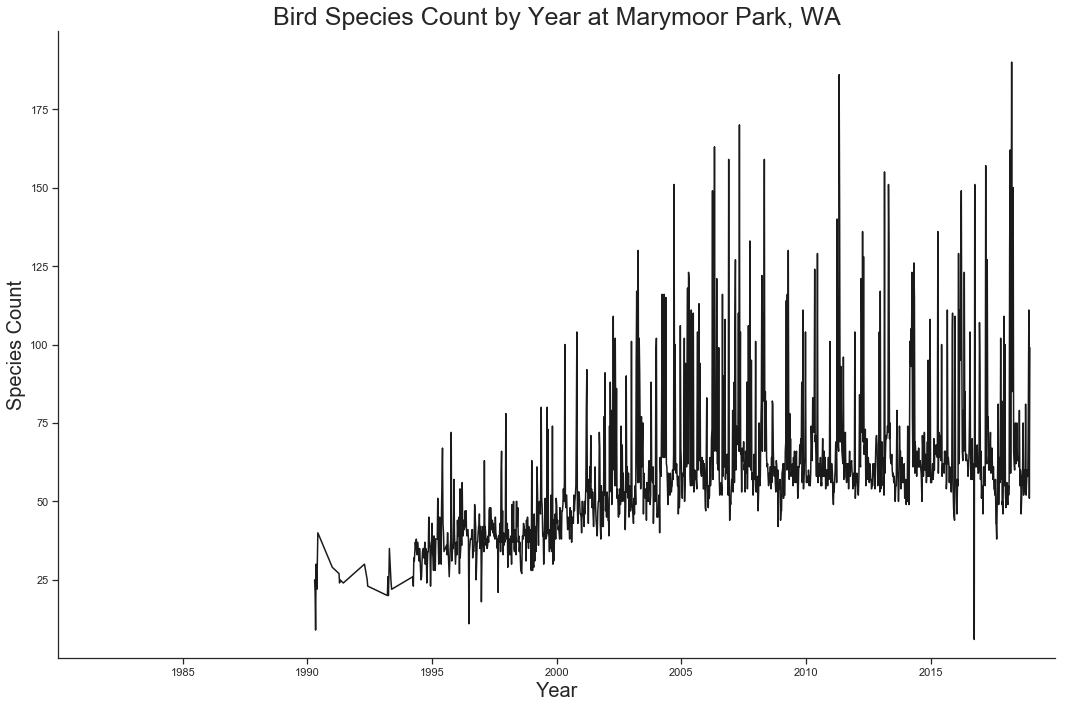

In [27]:
sns.set()
plt.figure(figsize=(15, 10))
sns.set_style("white", {"xtick.bottom":True, "ytick.left":True})
sns.lineplot(x='yw_num', y='spec_count', data=sc_noz, color='k')
sns.despine()
plt.xlim(1980, 2020)
plt.xticks([1985, 1990, 1995, 2000, 2005, 2010, 2015])
plt.xlabel('Year', fontsize='20')
plt.ylim(0, 200)
plt.yticks([25, 50, 75, 100, 125, 150, 175])
plt.ylabel('Species Count', fontsize='20')
plt.title('Bird Species Count by Year at Marymoor Park, WA', fontsize='25')
plt.tight_layout()
plt.show()

In [28]:
sc = year_weeks.merge(spec_count_9018, how='left', on='yw_num').copy()

In [29]:
sc.fillna(0, inplace=True)
sc.isna().any()

yw_num        False
spec_count    False
dtype: bool

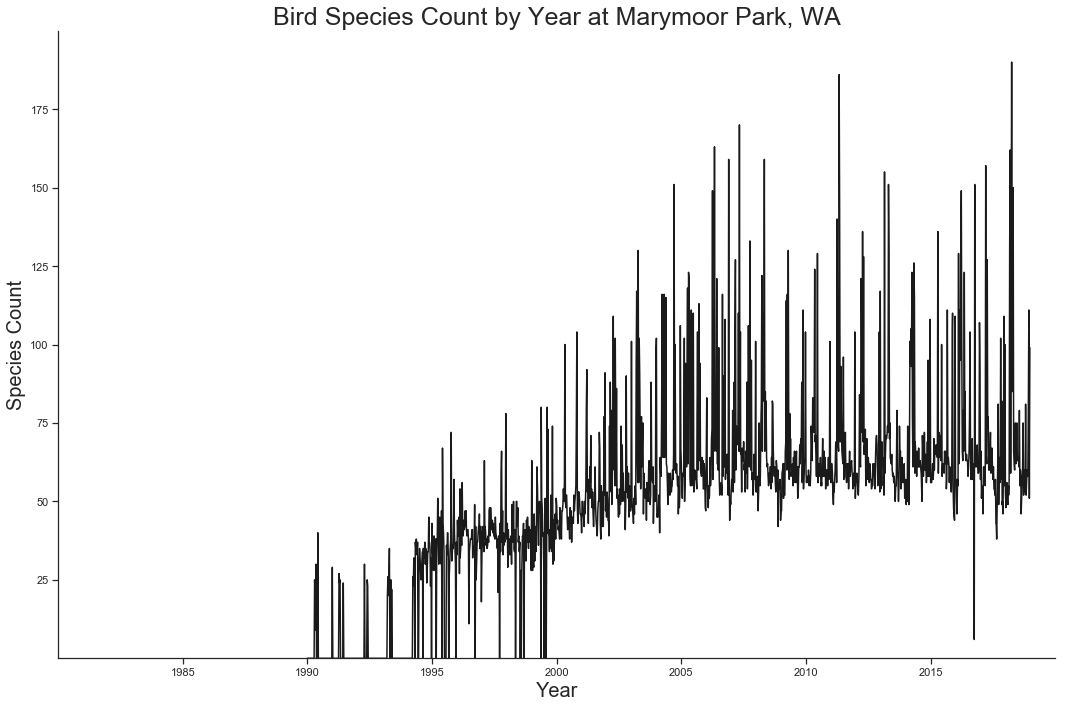

In [30]:
sns.set()
plt.figure(figsize=(15, 10))
sns.set_style("white", {"xtick.bottom":True, "ytick.left":True})
sns.lineplot(x='yw_num', y='spec_count', data=sc, color='k')
sns.despine()
plt.xlim(1980, 2020)
plt.xticks([1985, 1990, 1995, 2000, 2005, 2010, 2015])
plt.xlabel('Year', fontsize='20')
plt.ylim(0, 200)
plt.yticks([25, 50, 75, 100, 125, 150, 175])
plt.ylabel('Species Count', fontsize='20')
plt.title('Bird Species Count by Year at Marymoor Park, WA', fontsize='25')
plt.tight_layout()
plt.show()

Visually I can easily see where any species counts are zero (any line that touches the x-axis). It is more likely that no observations took place that week. I want a datset where observations were made each week, so decide to start in 2000.

In [31]:
sc_2000 = sc[sc['yw_num'] >= 2000].copy()

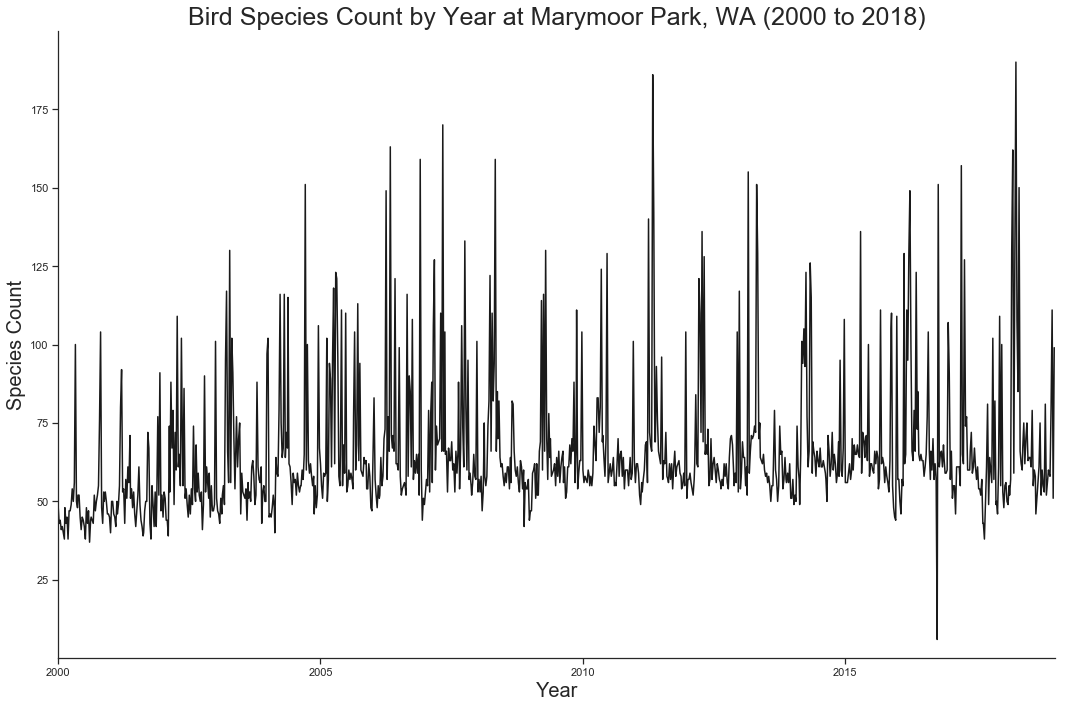

In [32]:
sns.set()
plt.figure(figsize=(15, 10))
sns.set_style("white", {"xtick.bottom":True, "ytick.left":True})
sns.lineplot(x='yw_num', y='spec_count', data=sc_2000, color='k')
sns.despine()
plt.xlim(2000, 2019)
plt.xticks([2000, 2005, 2010, 2015])
plt.xlabel('Year', fontsize='20')
plt.ylim(0, 200)
plt.yticks([25, 50, 75, 100, 125, 150, 175])
plt.ylabel('Species Count', fontsize='20')
plt.title('Bird Species Count by Year at Marymoor Park, WA (2000 to 2018)', fontsize='25')
plt.tight_layout()
plt.show()

In [33]:
sc_2000.reset_index(inplace=True)

In [42]:
sc_2000 = sc_2000.drop(['index'], axis=1).copy()

In [43]:
sc_2000.head()

,yw_num,spec_count
0,2000.00,49.0
1,2000.02,43.0
2,2000.04,44.0
3,2000.06,41.0
4,2000.08,42.0


In [98]:
def back_to_datetime(tag):
    """Takes numeric value of year with day of year as decimal and 
    returns timestamp."""
    year = pd.to_datetime(str(tag)[:4])
    day_decimal = float(str(tag - int(tag))[:4])
    days_in_year = pd.to_timedelta(day_decimal*365, unit='D')
    return year + days_in_year

In [137]:
sc_2000['Date'] = sc_2000.yw_num.apply(back_to_datetime)

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
import matplotlib

In [139]:
series = pd.DataFrame(sc_2000['spec_count'].values, index=sc_2000['Date'])

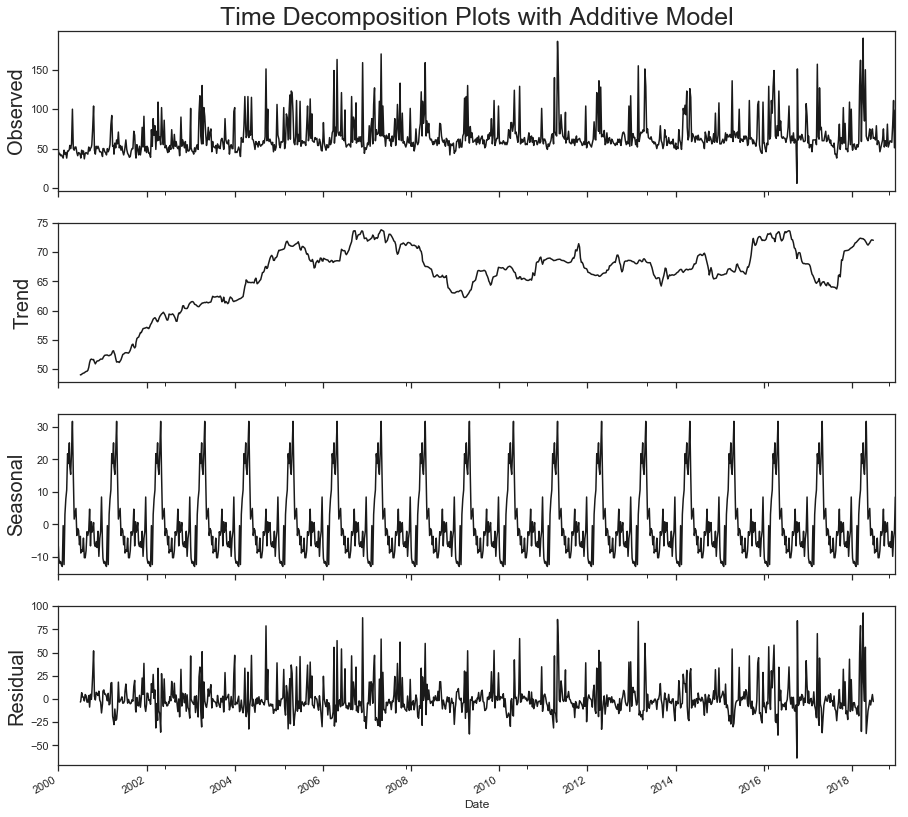

In [141]:
result = seasonal_decompose(series, model='additive', freq=52)
def plotseasonal(res, axes):
    result.observed.plot(ax=axes[0], color='k', legend=False)
    axes[0].set_ylabel('Observed', fontsize='20')
    axes[0].set_title('Time Decomposition Plots with Additive Model', fontsize='25')
    result.trend.plot(ax=axes[1], color='k', legend=False)
    axes[1].set_ylabel('Trend', fontsize='20')
    result.seasonal.plot(ax=axes[2], color='k', legend=False)
    axes[2].set_ylabel('Seasonal', fontsize='20')
    result.resid.plot(ax=axes[3], color='k', legend=False)
    axes[3].set_ylabel('Residual', fontsize='20')
    
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(15,15))
plotseasonal(result, axes[:])

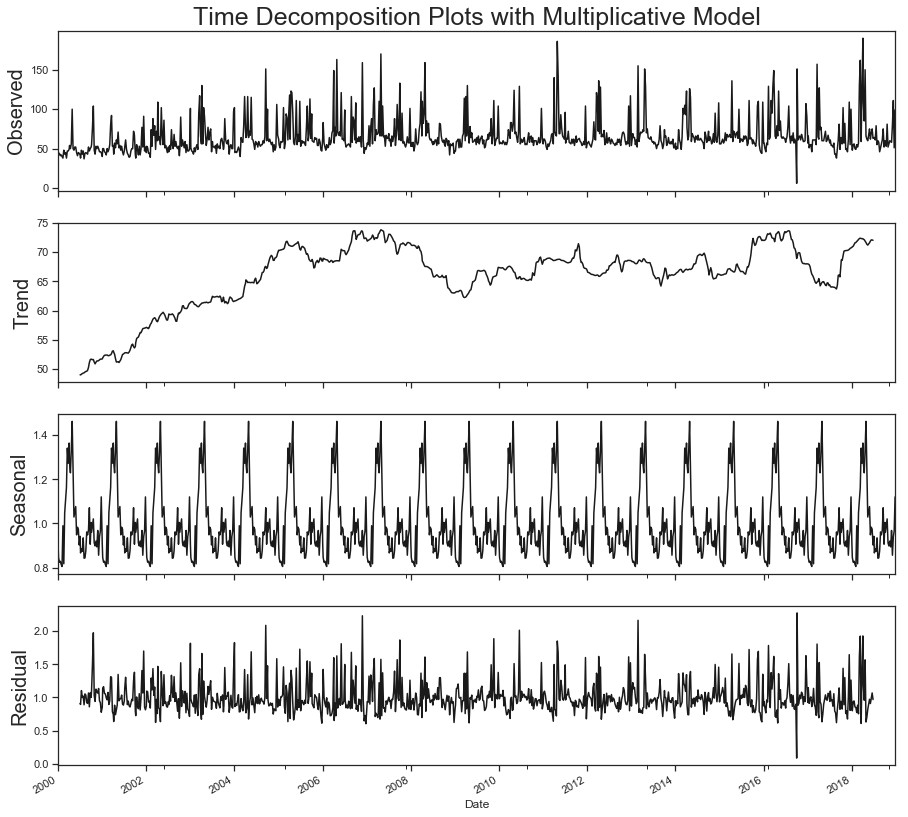

In [143]:
result = seasonal_decompose(series, model='multiplicative', freq=52)
def plotseasonal(res, axes):
    result.observed.plot(ax=axes[0], color='k', legend=False)
    axes[0].set_ylabel('Observed', fontsize='20')
    axes[0].set_title('Time Decomposition Plots with Multiplicative Model', fontsize='25')
    result.trend.plot(ax=axes[1], color='k', legend=False)
    axes[1].set_ylabel('Trend', fontsize='20')
    result.seasonal.plot(ax=axes[2], color='k', legend=False)
    axes[2].set_ylabel('Seasonal', fontsize='20')
    result.resid.plot(ax=axes[3], color='k', legend=False)
    axes[3].set_ylabel('Residual', fontsize='20')
    
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(15,15))
plotseasonal(result, axes[:])